In [46]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [48]:
df = pd.read_csv('Real estate.csv')

In [49]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [50]:
df.describe

<bound method NDFrame.describe of       No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4

C:\Users\Nikita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


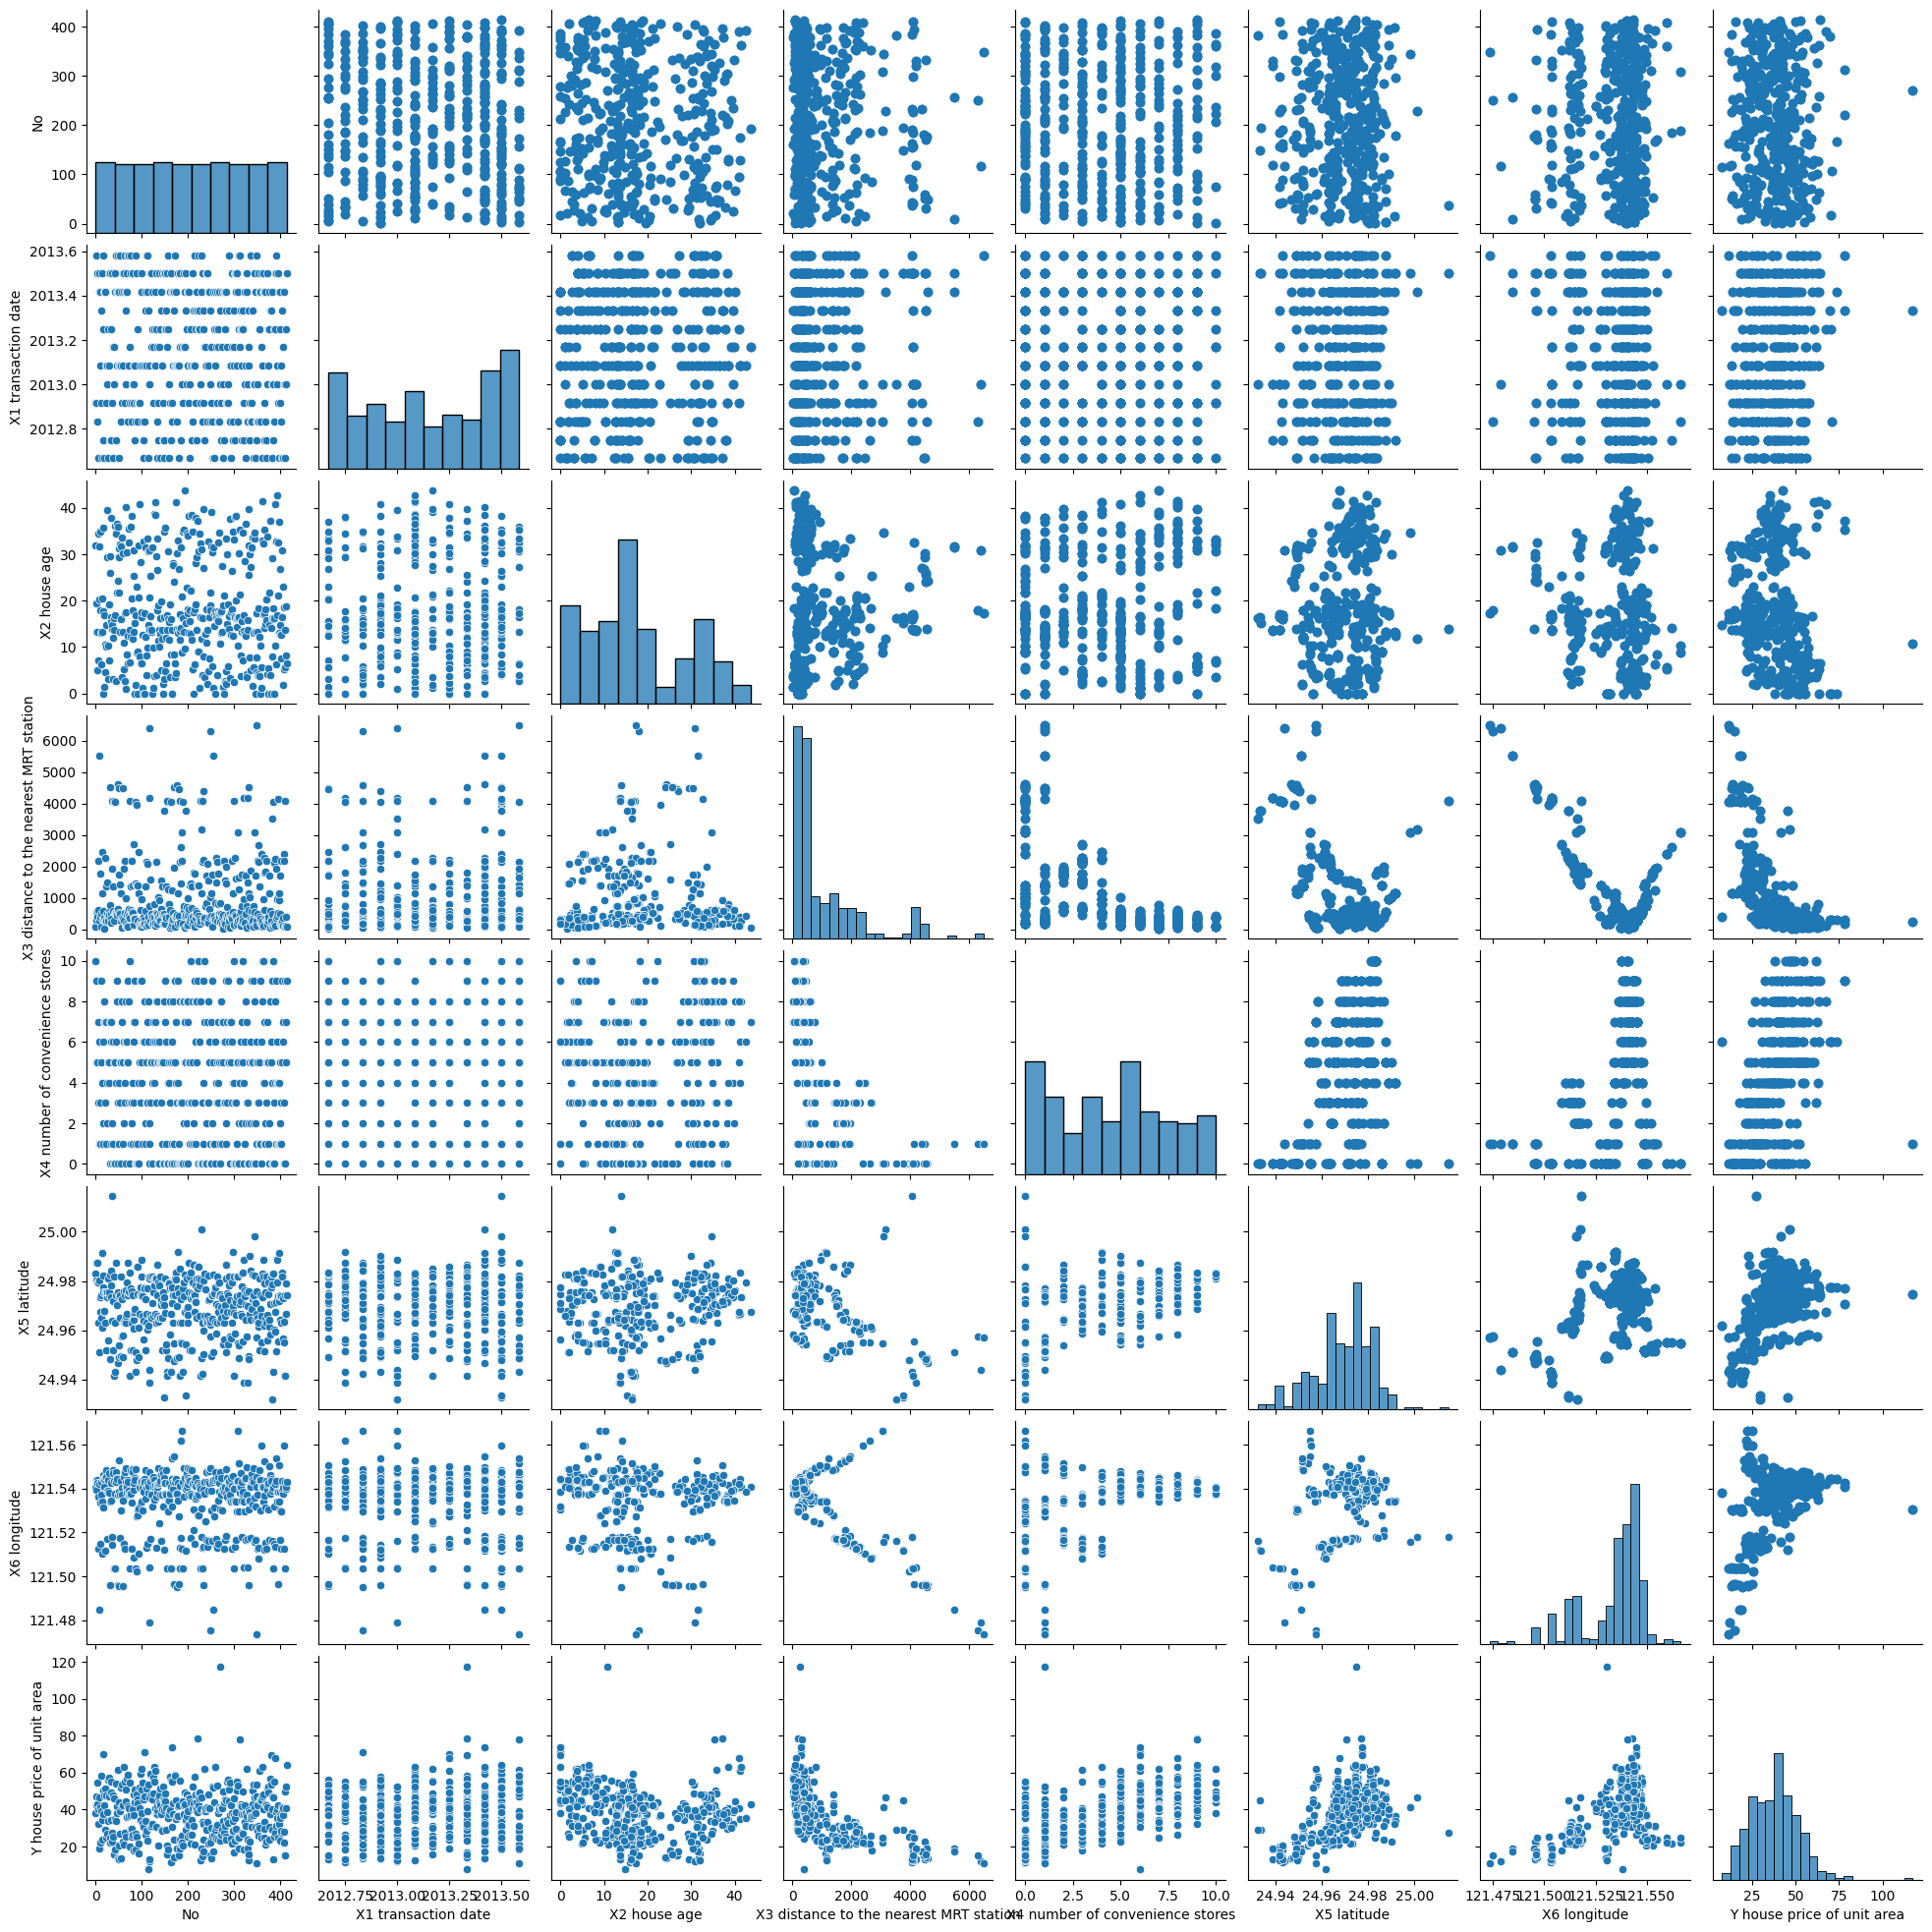

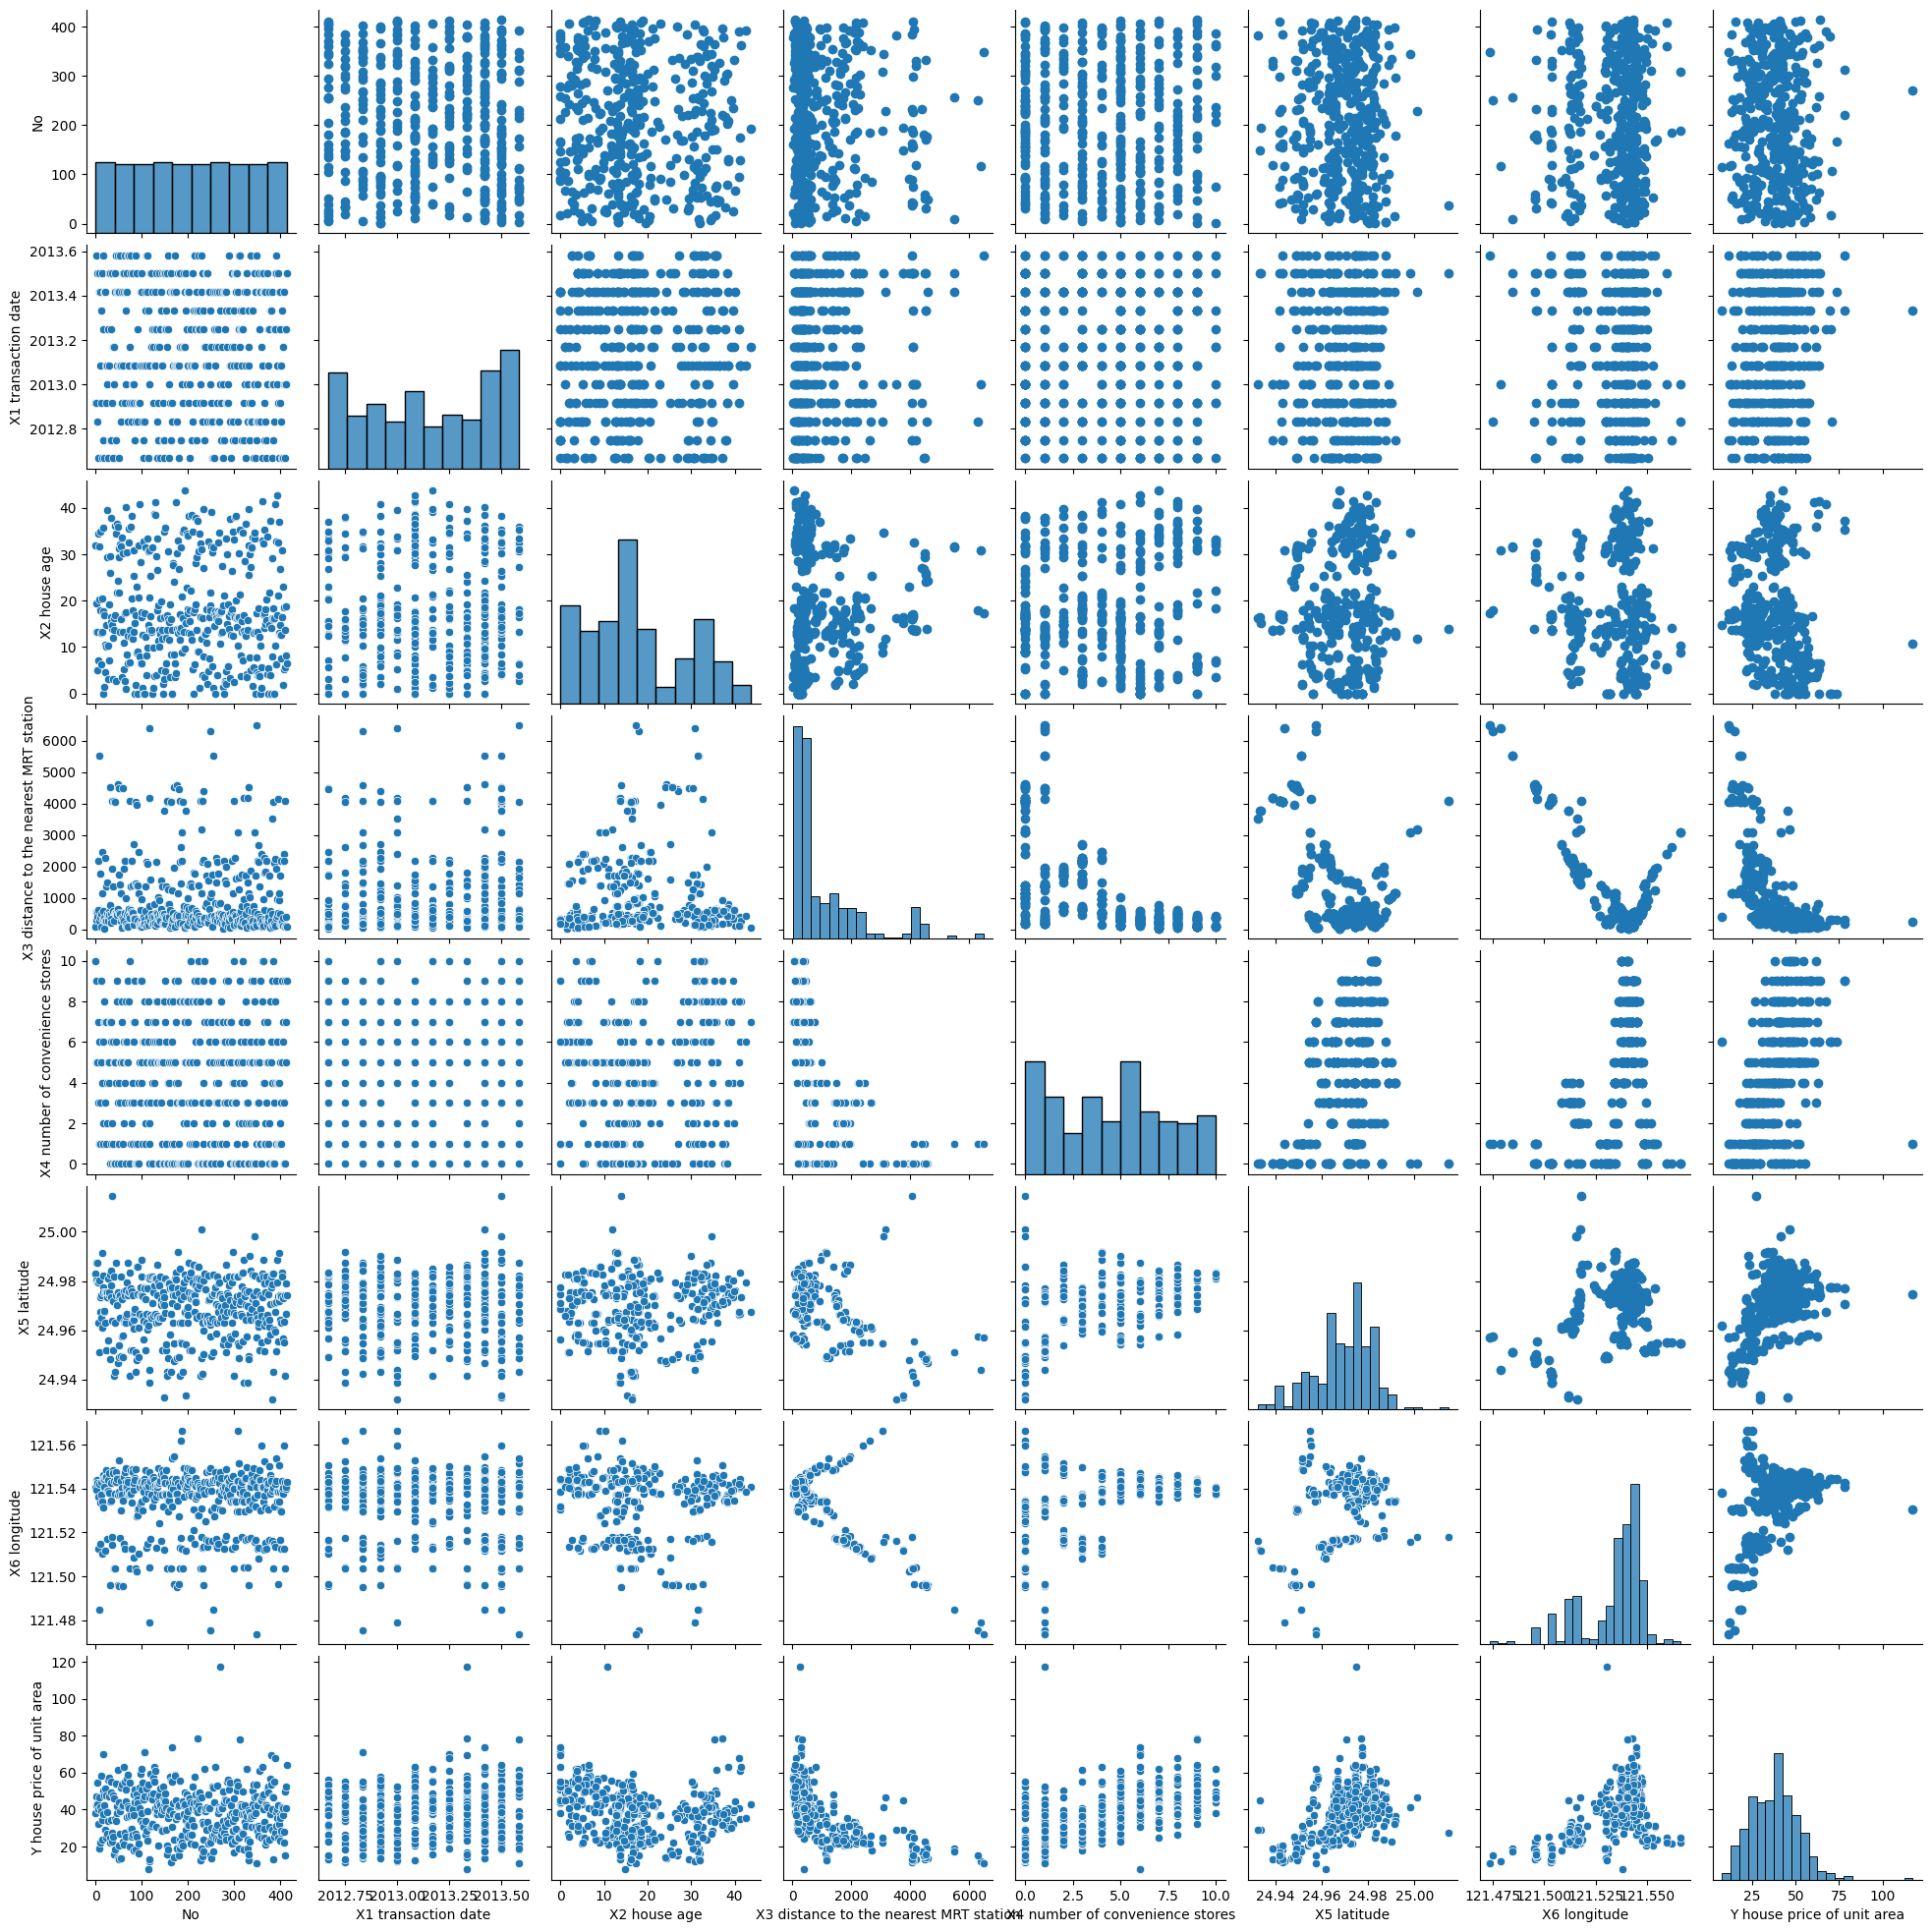

In [62]:
g= sns.pairplot(df)
g.map_upper(plt.scatter)

In [52]:
X = df.drop('Y house price of unit area',axis=1)
y = df['Y house price of unit area']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4,random_state = 42)  # создаем тестовые наборы

In [54]:
lin_reg = LinearRegression()  #создаем можель
lin_reg.fit (X_train, y_train)

LinearRegression()

In [55]:
y_pred = lin_reg.predict(X_test)

In [56]:
lin_reg.coef_

pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coedicients']) #выводим коэффициенты

,Coedicients
No,-0.007268
X1 transaction date,5.442443
X2 house age,-0.246333
X3 distance to the nearest MRT station,-0.005360
X4 number of convenience stores,1.121822
X5 latitude,241.359528
X6 longitude,-74.985711


In [57]:
MAE = metrics.mean_absolute_error(y_test,y_pred) # Средняя абсолютная ошибка
MSE = metrics.mean_squared_error(y_test,y_pred) # Среднеквадратическая ошибка
RMSE = np.sqrt(MSE) # R^2

pd.DataFrame([MAE,MSE,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['Значение'])

,Metrics
MAE,5.872423
MSE,66.214040
RMSE,8.137201
